In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras 
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix , accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob 
import pandas as pan
import matplotlib.pyplot as plotter
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Create train Files_Name
image_data='/kaggle/input/chest-x-ray-dataset-4-categories/Chest X_Ray Dataset'
train_files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(train_files)
train_labels = [os.path.dirname(i).split("/")[-1] for i in train_files]
train_data = zip(train_files, train_labels)
train_df = pd.DataFrame(train_data, columns=["Image", "Label"])
train_df

,Image,Label
0,/kaggle/input/chest-x-ray-dataset-4-categories...,PNEUMONIA
1,/kaggle/input/chest-x-ray-dataset-4-categories...,NORMAL
2,/kaggle/input/chest-x-ray-dataset-4-categories...,TURBERCULOSIS
3,/kaggle/input/chest-x-ray-dataset-4-categories...,NORMAL
4,/kaggle/input/chest-x-ray-dataset-4-categories...,PNEUMONIA
...,...,...
7127,/kaggle/input/chest-x-ray-dataset-4-categories...,PNEUMONIA
7128,/kaggle/input/chest-x-ray-dataset-4-categories...,PNEUMONIA
7129,/kaggle/input/chest-x-ray-dataset-4-categories...,PNEUMONIA
7130,/kaggle/input/chest-x-ray-dataset-4-categories...,PNEUMONIA


Label
PNEUMONIA        59.913068
NORMAL           22.195738
TURBERCULOSIS     9.814919
COVID19           8.076276
Name: proportion, dtype: float64


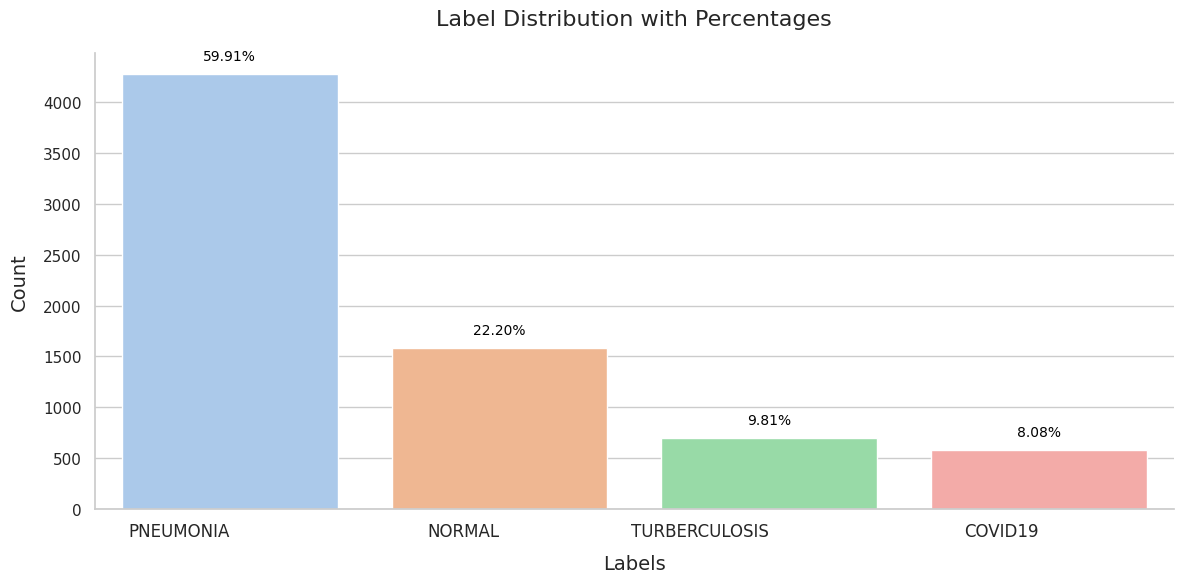

In [3]:
# Set a theme for better aesthetics
sns.set_theme(style="whitegrid")

# Calculate counts and percentages for each label
count_data = train_df["Label"].value_counts()
percentage_data = train_df["Label"].value_counts(normalize=True) * 100  # Calculate percentage

# Print percentage for each label (optional)
print(percentage_data)

# Sort the labels based on count values in descending order
sorted_data = count_data.sort_values(ascending=False).index

# Create a color palette for the bars
palette = sns.color_palette("pastel", len(sorted_data))

# Plot the count plot with sorted labels
plt.figure(figsize=(12, 6))
ax = sns.countplot(x=train_df["Label"], order=sorted_data, palette=palette)

# Annotate each bar with the percentage value
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    percentage = f'{(height / count_data.sum()) * 100:.2f}%'  # Calculate percentage
    ax.annotate(percentage,  # The label to be annotated
                (p.get_x() + p.get_width() / 2., height),  # Position of the label
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 8), textcoords='offset points')

# Rotate x-axis labels for better visibility and set the label font size
plt.xticks(rotation=0, ha='right', fontsize=12)

# Add title and labels with improved fonts and padding
plt.title("Label Distribution with Percentages", fontsize=16, pad=20)
plt.xlabel("Labels", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Credit:


https://www.kaggle.com/code/guanlintao/acc-98-convnexttiny-chest-x-ray/notebook